# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Enter Your Name

<br>

## Please show and display ALL your calculations and results.


In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [9]:
df = pd.read_csv("/content/Ulta Skincare Reviews.csv")

df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [10]:
df = df.rename(columns={'Review_Title': 'review', "Review_Text": 'text', "Verified_Buyer": 'verified', "Review_Location": "location", "Review_Date": 'date'})

df = df.drop(["Review_Upvotes", "Review_Downvotes", "Scrape_Date"], axis=1)

In [11]:
df.head()

,review,text,verified,date,location,Product,Brand
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica


In [7]:
df.review.value_counts()

Amazing product                    95
Love this mask                     90
It's hydrating                     89
Would absolutely buy this again    89
Buy it!                            89
                                   ..
I was supposed to get               1
Love this cleanser. Leaves my       1
Nice and soothing for winter        1
Go strong!                          1
This is the best!!!                 1
Name: review, Length: 2828, dtype: int64

In [8]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.9 MB/s eta 0:00:00


In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vds = SentimentIntensityAnalyzer()

df.fillna('Unknown', inplace=True)

df['score'] = df['text'].apply(lambda review: vds.polarity_scores(review))

df['compound']  = df['score'].apply(lambda score_dict: score_dict['compound'])

df['sentiment'] = df['compound'].apply(lambda c: 'good' if c >=0 else 'bad')

df = df.drop(['score', 'compound'], axis=1)

df.head()

,review,text,verified,date,location,Product,Brand,sentiment
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,good
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,good
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,good
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,good
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,good


In [33]:
def remove(tweet):
  #remove mention
  tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
  # remove stock market tickers like $GE
  tweet = re.sub(r'\$\w*', '', tweet)
  # remove old style retweet text "RT"
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'^rt[\s]+', '', tweet)
  # remove hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'^https[\s]+', '', tweet)
  # remove hashtags
  # only removing the hash # sign from the word
  tweet = re.sub(r'#', '', tweet)
  tweet = re.sub(r'%', '', tweet)
  #remove coma
  tweet = re.sub(r',','',tweet)
  #remove angka
  tweet = re.sub('[0-9]+', '', tweet)
  tweet = re.sub(r':', '', tweet)
  #remove space
  tweet = tweet.strip()
  #remove double space
  tweet = re.sub('\s+',' ',tweet)
  return tweet
  
df['cleaned'] = df['review'].apply(lambda x: remove(x.lower()))
df.drop_duplicates(subset ="cleaned", keep = 'first', inplace = True)

In [15]:
df.groupby('Product')['sentiment'].value_counts()

Product                      sentiment
Daily Microfoliant           pos          1414
                             neg            86
Daily Superfoliant           pos          1410
                             neg            90
Hydro Masque Exfoliant       pos           768
                             neg            32
Multi-Vitamin Thermafoliant  pos           334
                             neg            16
Name: sentiment, dtype: int64

In [21]:
df[df['text'].str.contains('skin issue')][['text', 'sentiment']]

,text,sentiment
1834,II have a pigmentation skin issue. I have tried multiple products with no remedy. I have used this for about 2 years now. It is the only product successful in removing my dark spots. My daughter also has had success with her acne by using this product. Its a must buy for me. Worth every penny.,pos
1922,"I like to switch between this and the microfoliant. When I'm seeing more skin issues, the charcoal in this really helps. Don't use too much though!",pos
2050,"I received a free product of Dermalogica Intensive Moisture Cleanser and was so glad because my skin is dry and flaky and has a rough texture and I had never heard of this product before. This product is very gentle and does not irritate my skin, and cleans my face including makeup removal very well. After a couple of weeks of use my skin felt softer and looker fresher and moisturized. i wish is had a better lather as I enjoy a good foam and wish the scent was better or had none at all, but all in all I think it solved one of my biggest skin issues, the dry, flaky, dull look so will buy when my sampe runs out.",pos
3363,"I had to write about it. I dealt with a lot of facial hair and I would tweeze and pick on my face, leaving it bumpy, red and rough. I also deal with hyperpigmentation all over my face and under my chin. The issues continued even after I stopped picking my face and started laser hair removal. But my god after using this exfoliator a few times, it's like my skin changed completely! It's silky smooth and the redness is gone! I had always been embarrassed with the texture of my skin, to the point that I didn't like anyone touching me, but those insecurities are GONE. I can't stopped touching face! I have seen my hyperpigmentation lighten up, but that was after I used the product for 3 weeks and I have kept up with my weekly skin routine with other products and the fact that I've stopped picking at my skin, so I'm not sure how effective it's on discoloration. But I would recommend anyone who deals with skin issues they have because of facial hair removal, it's a lifesaver.",neg
3691,"This is suuuuuch a great product. I have skin issues from a-z ; acne, blackheads, dry, uneven skin tone, when it's not dry it's oily etc etc. My skin started looking better after the FIRST USE. love it. Make sure when using this that you add water drop by drop-literally. The less water the more exfoliation, the more water the less gritty it is blah blah you get the point. Try it.",pos
3768,"I used to have skin issue like breakouts and what not. After using this it was less and less frequent. I feel I have better control and understanding of self care and this is a big part of of why. It has improved my toners,serums, and moisturizers performance.",pos


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667 entries, 0 to 4149
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   review     2667 non-null   int64
 1   text       2667 non-null   int64
 2   verified   2667 non-null   int64
 3   date       2667 non-null   int64
 4   location   2667 non-null   int64
 5   Product    2667 non-null   int64
 6   Brand      2667 non-null   int64
 7   sentiment  2667 non-null   int64
 8   cleaned    2667 non-null   int64
dtypes: int64(9)
memory usage: 272.9 KB


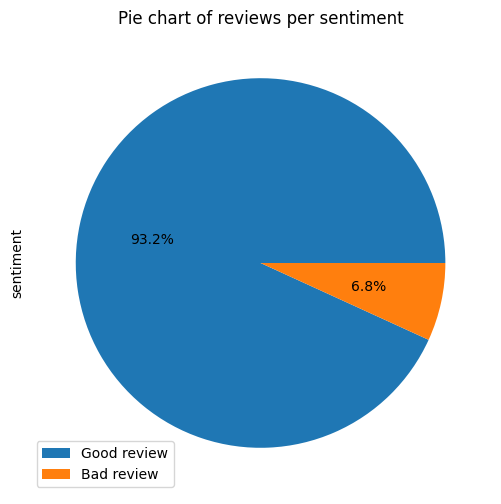

In [53]:
df['sentiment'].value_counts().plot.pie(figsize=(6,6),title="Pie chart of reviews per sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Good review","Bad review"]
plt.legend(labels,loc=3)
plt.show()

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


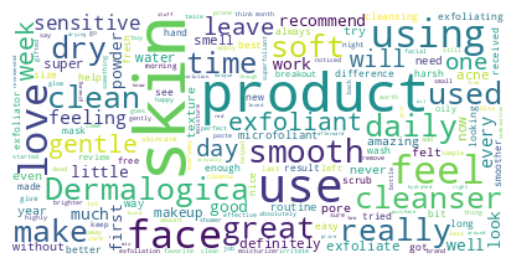

In [38]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stopword = set(stopwords.words('english'))
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword)
    return text
  
df['cleaned'] = df['cleaned'].apply(clean_stopwords)

text = ' '.join(word for word in df['text'])

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
col = df.columns

for i in col:
  encoder = LabelEncoder()
  df[i] = encoder.fit_transform(df[i])

In [49]:
X = df.drop(['sentiment', 'text'], axis=1)
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18, test_size=0.3)

In [50]:
model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy_score(y_test, pred)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9325842696629213